In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/clean/projects_cleaned.csv')
df.head()

,Project Type,Project Type Name,Budget Line,Budget Line Title,Funding Type,Fiscal Year,Amount
0,AG,DEPARTMENT FOR THE AGING,AG 0001,IMPROVEMENTS TO PROPERTY USED BY DEPARTMENT FO...,C,2019,3306783.0
1,AG,DEPARTMENT FOR THE AGING,AG 0002,"PURCHASE OF AUTOS, COMPUTERS, OTHER EQUIP FOR ...",C,2019,0.0
2,AG,DEPARTMENT FOR THE AGING,AG MN235,"LENOX HILL NEIGHBORHOOD HOUSE, INC.",C,2019,50000.0
3,BR,WATERWAY BRIDGES,BR 0231,"QUEENSBORO BRIDGE, REHABILITATION",C,2019,141151222.0
4,BR,WATERWAY BRIDGES,BR 0253,RECONSTRUCTION OF WILLIAMSBURG BRIDGE,C,2019,0.0


In [42]:
df.info()
df.describe()
print("Unique project types:", df['Project Type'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58848 entries, 0 to 58847
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Project Type       58848 non-null  object 
 1   Project Type Name  58848 non-null  object 
 2   Budget Line        58848 non-null  object 
 3   Budget Line Title  58788 non-null  object 
 4   Funding Type       58848 non-null  object 
 5   Fiscal Year        58848 non-null  int64  
 6   Amount             58848 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.1+ MB
Unique project types: 47


In [ ]:
dept_summary = df.groupby('Project Type Name')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)
dept_summary.head()

year_summary = df.groupby('Fiscal Year')['Amount'].sum().reset_index().sort_values('Fiscal Year')
year_summary

dept_summary['Amount'] = pd.to_numeric(dept_summary['Amount'], errors='coerce')

def format_amount(x):
    if x >= 1e9:
        return f"${x/1e9:.2f} billion"
    elif x >= 1e6:
        return f"${x/1e6:.2f} million"
    else:2H
        return f"${x:,.0f}"

dept_summary['Formatted Amount'] = dept_summary['Amount'].apply(format_amount)
dept_summary.head()

SyntaxError: invalid decimal literal (2949906403.py, line 14)

In [ ]:
dept_summary.groupby(by=['Formatted Amount'])
print(dept_summary) 

<Axes: >

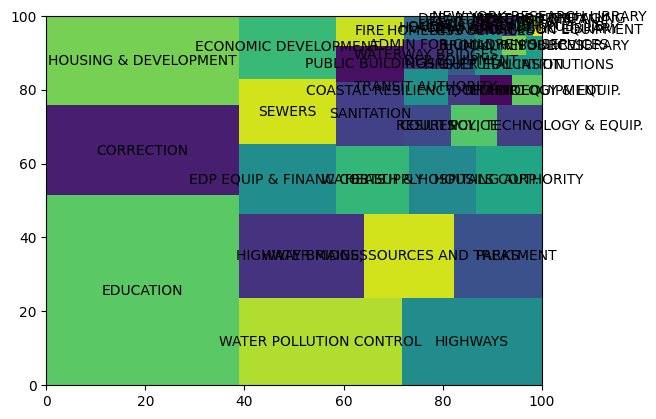

In [44]:
squarify.plot(sizes=dept_summary['Amount'], label=dept_summary['Project Type Name'])